In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sn
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from PIL import Image
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

# Read csv

In [2]:
#read the csv
#column Breed shows the y with the image name
data_csv = pd.read_csv('dataset_CV.csv')
data_csv

,DogId,Breed,Image,ImageNumber
0,6673,SIBERIAN HUSKY,4d924d95-de4c-43c0-a586-9fb19cadf905.jpg,1
1,6673,SIBERIAN HUSKY,851cc9ee-fc4d-430c-99f6-6425b8bbbe6b.jpg,2
2,6673,SIBERIAN HUSKY,7d055dfa-dc6f-4f2b-a7be-dc8bc666836f.jpg,3
3,6673,SIBERIAN HUSKY,f1f55f0a-c3d6-442b-b686-71b83b510dc5.jpg,4
4,6671,SIBERIAN HUSKY,a2e49a61-7c6a-46f0-a80e-9f32e596c1df.jpg,1
...,...,...,...,...
4139,38513,BORDER COLLIE,e3957a7c-9289-4441-bdbd-d2289bef745d.jpg,5
4140,38513,BORDER COLLIE,48afd0ab-baf2-4ee8-9584-9563cec529e7.jpg,6
4141,38513,BORDER COLLIE,8f8c4ea0-7426-4188-bb6c-94fa1ecb1e33.jpg,7
4142,38513,BORDER COLLIE,cce5499f-eb04-4d8c-8d3f-c9c9bee16c5c.jpg,8


# Preprocessing

In [3]:
# setting transforms to use on images
trans = transforms.Compose([
    transforms.AugMix(),
    transforms.ToTensor(),
    transforms.Normalize(mean=0.5, std=0.5),
    transforms.Resize((180, 180)),
])

In [4]:
location = r"dog_breed_photos"


# prepare the image by setting to RGB and applying the transforms (return tensor)
def create_data(path):
    image = Image.open(Path(location) / path).convert('RGB')
    img = trans(image)
    image.close()
    return img


# prepare the label and turn to tensor
def create_label(label):
    if label == "AMERICAN STAFFORDSHIRE BULL TERRIER":
        y = 0
    elif label == "BULL ARAB":
        y = 1
    elif label == "GERMAN SHEPHERD":
        y = 2
    elif label == "SIBERIAN HUSKY":
        y = 3
    elif label == "BORDER COLLIE":
        y = 4
    return torch.tensor(y)


data_csv['data'] = data_csv['Image'].apply(lambda image: create_data(image))
data_csv['class'] = data_csv['Breed'].apply(lambda breed: create_label(breed))
data_csv

,DogId,Breed,Image,ImageNumber,data,class
0,6673,SIBERIAN HUSKY,4d924d95-de4c-43c0-a586-9fb19cadf905.jpg,1,"[[[tensor(0.3344), tensor(0.0293), tensor(0.03...",tensor(3)
1,6673,SIBERIAN HUSKY,851cc9ee-fc4d-430c-99f6-6425b8bbbe6b.jpg,2,"[[[tensor(0.1133), tensor(0.0527), tensor(-0.0...",tensor(3)
2,6673,SIBERIAN HUSKY,7d055dfa-dc6f-4f2b-a7be-dc8bc666836f.jpg,3,"[[[tensor(-0.1618), tensor(0.1340), tensor(0.0...",tensor(3)
3,6673,SIBERIAN HUSKY,f1f55f0a-c3d6-442b-b686-71b83b510dc5.jpg,4,"[[[tensor(0.1294), tensor(0.2097), tensor(0.24...",tensor(3)
4,6671,SIBERIAN HUSKY,a2e49a61-7c6a-46f0-a80e-9f32e596c1df.jpg,1,"[[[tensor(-0.7651), tensor(-0.8827), tensor(-0...",tensor(3)
...,...,...,...,...,...,...
4139,38513,BORDER COLLIE,e3957a7c-9289-4441-bdbd-d2289bef745d.jpg,5,"[[[tensor(-0.6825), tensor(-0.7020), tensor(-0...",tensor(4)
4140,38513,BORDER COLLIE,48afd0ab-baf2-4ee8-9584-9563cec529e7.jpg,6,"[[[tensor(-0.9294), tensor(-0.9523), tensor(-0...",tensor(4)
4141,38513,BORDER COLLIE,8f8c4ea0-7426-4188-bb6c-94fa1ecb1e33.jpg,7,"[[[tensor(-0.4672), tensor(-0.5440), tensor(-0...",tensor(4)
4142,38513,BORDER COLLIE,cce5499f-eb04-4d8c-8d3f-c9c9bee16c5c.jpg,8,"[[[tensor(-0.3426), tensor(-0.2556), tensor(-0...",tensor(4)


In [5]:
#create dataframe for loader
df = pd.concat([data_csv['data'], data_csv['class']], ignore_index=True, axis=1)
df

,0,1
0,"[[[tensor(0.3344), tensor(0.0293), tensor(0.03...",tensor(3)
1,"[[[tensor(0.1133), tensor(0.0527), tensor(-0.0...",tensor(3)
2,"[[[tensor(-0.1618), tensor(0.1340), tensor(0.0...",tensor(3)
3,"[[[tensor(0.1294), tensor(0.2097), tensor(0.24...",tensor(3)
4,"[[[tensor(-0.7651), tensor(-0.8827), tensor(-0...",tensor(3)
...,...,...
4139,"[[[tensor(-0.6825), tensor(-0.7020), tensor(-0...",tensor(4)
4140,"[[[tensor(-0.9294), tensor(-0.9523), tensor(-0...",tensor(4)
4141,"[[[tensor(-0.4672), tensor(-0.5440), tensor(-0...",tensor(4)
4142,"[[[tensor(-0.3426), tensor(-0.2556), tensor(-0...",tensor(4)


In [6]:
# transform to campatible datatype
df_dict = df.to_dict('index')
print(type(df_dict))
df_dict

<class 'dict'>


{0: {0: tensor([[[ 0.3344,  0.0293,  0.0352,  ...,  0.1628,  0.2115,  0.2141],
           [ 0.3107,  0.8598,  0.1165,  ...,  0.1134,  0.0615,  0.1087],
           [ 0.1299, -0.0177, -0.0863,  ...,  0.2068,  0.2235,  0.0683],
           ...,
           [-0.4698, -0.2237,  0.1635,  ..., -0.4070, -0.6841,  0.3194],
           [ 0.0233, -0.0427,  0.2753,  ..., -0.3026, -0.4968, -0.1880],
           [-0.2140,  0.0624, -0.1801,  ...,  0.2296,  0.4475, -0.0124]],
  
          [[ 0.2065, -0.0338, -0.0746,  ...,  0.1720,  0.2193,  0.2062],
           [ 0.1745,  0.8038,  0.0294,  ...,  0.1212,  0.0693,  0.1174],
           [-0.0371, -0.0601, -0.1706,  ...,  0.1845,  0.2140,  0.0729],
           ...,
           [-0.5157, -0.2636,  0.0182,  ...,  0.0969, -0.2663,  0.3570],
           [-0.0794, -0.1202,  0.1126,  ...,  0.2203,  0.0098, -0.1339],
           [-0.3732, -0.0118, -0.3128,  ...,  0.4296,  0.6051, -0.0306]],
  
          [[ 0.1601, -0.0416, -0.0937,  ...,  0.2112,  0.2586,  0.2533],
     

# Train - Test Split and Dataloader

In [7]:
# train, test split
train, test = train_test_split(df_dict, test_size=0.25, random_state=42, shuffle=True)
train

[{0: tensor([[[ 0.3782,  0.3837,  0.3841,  ...,  0.5231,  0.5301,  0.5033],
           [ 0.3458,  0.3765,  0.3856,  ...,  0.0980,  0.5647, -0.2536],
           [ 0.2987,  0.3582,  0.3739,  ...,  0.5704,  0.4301,  0.4074],
           ...,
           [-0.5882, -0.5882, -0.5948,  ...,  0.0183,  0.0307,  0.0364],
           [-0.5686, -0.5667, -0.5765,  ...,  0.0510,  0.0549,  0.0595],
           [-0.5621, -0.5614, -0.5699,  ...,  0.0532,  0.0569,  0.0577]],
  
          [[ 0.0869,  0.0941,  0.0902,  ...,  0.3126,  0.2980,  0.2627],
           [ 0.0196,  0.0627,  0.0719,  ...,  0.4026,  0.3451,  0.4203],
           [-0.0525,  0.0340,  0.0834,  ...,  0.3460,  0.1856,  0.1536],
           ...,
           [-0.4222, -0.4222, -0.4301,  ...,  0.0510,  0.0680,  0.0747],
           [-0.3961, -0.3941, -0.4039,  ...,  0.0627,  0.0667,  0.0712],
           [-0.3895, -0.3889, -0.3974,  ...,  0.0577,  0.0418,  0.0473]],
  
          [[-0.6926, -0.6830, -0.6828,  ..., -0.3843, -0.4216, -0.4397],
        

In [8]:
#dataloader
train_loader = torch.utils.data.DataLoader(train, batch_size=2, shuffle=True)
test_loader = torch.utils.data.DataLoader(test, batch_size=1, shuffle=True)

# Define cnn model

In [12]:
#Define model

class Net(nn.Module):

    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3, 6, (3, 3)),
            nn.ReLU(),
            nn.Conv2d(6, 12, (3, 3), padding=1),
            nn.ReLU(),
            nn.Flatten(),
            nn.Linear(380208, 5),
        )

    def forward(self, x):
        return self.model(x)


model = Net()
print(model)

Net(
  (model): Sequential(
    (0): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(6, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): Flatten(start_dim=1, end_dim=-1)
    (5): Linear(in_features=380208, out_features=5, bias=True)
  )
)


In [13]:
# loss function and optimezer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Training

In [14]:
max_epochs = 15
train_losses = []

for epoch in range(max_epochs):
    train_loss = 0
    for i, data in enumerate(train_loader):
        inputs = data[0]
        labels = data[1]
        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * inputs.size(0)

    train_loss = train_loss / len(train_loader.sampler)
    print(f'Epoch: {epoch + 1}/{max_epochs} Loss: {train_loss :.5f}')
    train_losses.append(train_loss)

print('Finished Training')

Epoch: 1/15 Loss: 1.61009
Epoch: 2/15 Loss: 1.47575
Epoch: 3/15 Loss: 0.76822
Epoch: 4/15 Loss: 0.19924
Epoch: 5/15 Loss: 0.08590
Epoch: 6/15 Loss: 0.02115
Epoch: 7/15 Loss: 0.00153
Epoch: 8/15 Loss: 0.00066
Epoch: 9/15 Loss: 0.00043
Epoch: 10/15 Loss: 0.00033
Epoch: 11/15 Loss: 0.00026
Epoch: 12/15 Loss: 0.00022
Epoch: 13/15 Loss: 0.00019
Epoch: 14/15 Loss: 0.00016
Epoch: 15/15 Loss: 0.00014
Finished Training


# Evaluating

In [15]:
#eval
with torch.no_grad():
    correct = 0
    total = 0
    for data in test_loader:
        inputs = data[0]
        labels = data[1]
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Test Accuracy of the model: {} %'.format(100 * correct / total))

Test Accuracy of the model: 29.633204633204635 %


# Plotting

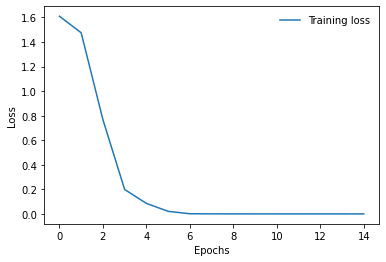

In [16]:
#visualize
plt.plot(train_losses, label='Training loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(frameon=False)

<AxesSubplot:>

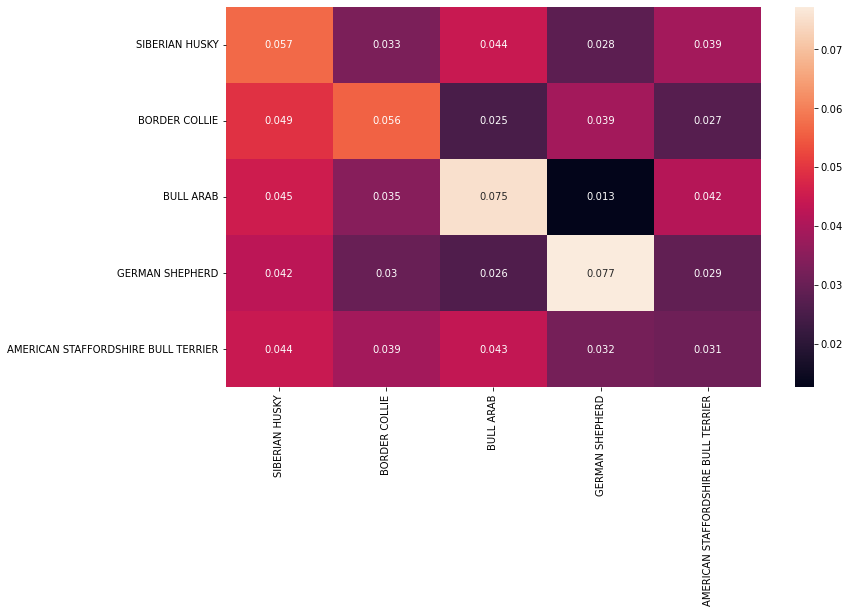

In [19]:
#confussion matrix
y_pred = []
y_true = []

for data in test_loader:
    inputs = data[0]
    labels = data[1]
    outputs = model(inputs)

    output = (torch.max(torch.exp(outputs), 1)[1]).data.cpu().numpy()
    y_pred.extend(output)

    labels = labels.data.cpu().numpy()
    y_true.extend(labels)

classes = ('SIBERIAN HUSKY', 'BORDER COLLIE', 'BULL ARAB', 'GERMAN SHEPHERD', 'AMERICAN STAFFORDSHIRE BULL TERRIER')

cf_matrix = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cf_matrix / np.sum(cf_matrix) * 10, index=[i for i in classes],
                     columns=[i for i in classes])
plt.figure(figsize=(12, 7))
sn.heatmap(df_cm, annot=True)